# Sprint3_線形回帰

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('drive/My Drive/data/house-prices-advanced-regression-techniques_train.csv')
X = df[['GrLivArea', 'YearBuilt']].values #2変数パターン
# X = df['GrLivArea'].values.reshape(-1,1) #1変数パターン
y = df['SalePrice'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
class ScratchLinearRegression():

    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    # 問題6（学習と推定）
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰の学習
        ----------
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データの特徴量
        y　：　次の形のndarray, shape (n_samples, 1)
          学習データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
          検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, 1)
          検証データの正解値
        """

        # メイン処理
        self.theta = np.zeros((X.shape[1],1)) #theta初期化
        m = len(y)

        for i in range(self.iter):
            # 問題1（過程関数の計算）
            hypothesis = self._linear_hypothesis(X, self.theta)
            
            if X_val is not None and y_val is not None: #検証データ(val)設定時稼働
                hypothesis_val = self._linear_hypothesis(X_val, self.theta)

            
            # 問題2（最急降下法によるパラメータの更新値計算）
            self.theta = self._gradient_descent(X, y, hypothesis, self.theta)

            # 問題7（学習曲線のプロット）のグラフ描画時（問題5（損失関数）で作成した関数を使用）
            self._loss_func(hypothesis, m, i, y, hypothesis_val=hypothesis_val, y_val=y_val)


    # 問題1
    def _linear_hypothesis(self, X, theta):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        theta：　
        　　　　パラメータベクトル（傾き）

        Returns
        -------
        hypothesis： 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """

        hypothesis = np.dot(X, theta) #yの推定結果

        return hypothesis

    # 問題2
    def _gradient_descent(self, X, y, hypothesis, theta):
        """
        最急降下法によるパラメータの更新値計算
        --------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ（説明変数）
        y　：　次の形のndarray, shape (n_samples, 1)
          学習データ（目的変数）
        hypothesis： 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        theta：　
        　　　　パラメータベクトル（傾き）

        Returns
        -------
        hypothesis： 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        m = len(y)

        cost = (1 / m) * np.dot(X.T, (hypothesis - y) )
        theta = theta - self.lr * cost #thetaの更新

        return theta

    # 問題3
    def predict(self, X):
        """
        線形回帰での推定
        --------
        X : 次の形のndarray, shape (n_samples, n_features)
          検証データ（説明変数）

        Returns
        -------
        Y_pred：
        　　　　検証結果（目的変数）
        """
        Y_pred = self._linear_hypothesis(X, self.theta)

        return Y_pred


    # 問題5
    def _loss_func(self, hypothesis, m, i, y, hypothesis_val=None, y_val=None):
        """
        損失関数
        --------
        hypothesis： 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        m：
        　　　y（目的変数）のサンプル数
        i：
        　　　ループ回数
        y　：　次の形のndarray, shape (n_samples, 1)
          学習データ（目的変数）
        hypothesis_val：
        　　　　線形の仮定関数による検証データの推定結果
    　　　　　　　y_val：
    　　　　　　　　　　　検証データ（目的関数）
        """
        diff = hypothesis - y
        sqr_errors = np.square(diff)
        j = 1 / (2 * m) * np.sum(sqr_errors)

        self.loss[i] = j

        if y_val is not None:
          m_val = len(y_val)

          diff = hypothesis_val - y_val
          sqr_errors = np.square(diff)
          
          j_val = 1 / (2 * m_val) * np.sum(sqr_errors)

          self.val_loss[i] = j_val
        
        return

    
    # 問題4
    def _mse(self, X, y):
        """
        平均二乗誤差の計算
        --------
        X : 次の形のndarray, shape (n_samples, n_features)
          検証データ（説明変数）
        y　：　次の形のndarray, shape (n_samples, 1)
          検証データ（目的変数）

        Returns
        -------
          線形の仮定関数による推定結果
        """

        return np.mean( ( self.predict(X) - y ) ** 2 )

num_iter = 100
lr = 0.0000001
no_bias = 0
verbose=0

a = ScratchLinearRegression(num_iter=num_iter, lr=lr, no_bias=no_bias, verbose=verbose)
a.fit(X_train,y_train, X_test, y_test)
Y_pred = a.predict(X_test)
print(Y_pred)

In [19]:
mse = a._mse(X_test, y_test)
print(f'mse: {int(mse)}')

mse: 3600748529


In [20]:
print(y.shape)
print(X.shape)
print(a.theta[0].shape)

(1460, 1)
(1460, 2)
(1,)


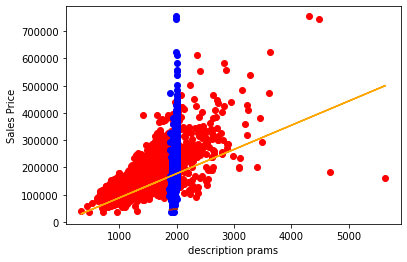

In [10]:
import matplotlib.pyplot as plt

y_theta = X * a.theta.reshape(1,2)

plt.xlabel('description prams')
plt.ylabel('Sales Price')
plt.scatter(X[:,0], y, color='red') # vs GrLivArea
plt.scatter(X[:,1], y, color='blue') #vs YearBuilt
plt.plot(X[:,0], y_theta[:,0], color='orange') # vs GrLivArea
plt.plot(X[:,1], y_theta[:,1], color='brown') #vs YearBuilt

plt.show()

# 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

In [22]:
#上方クラスへ実装済み
def _linear_hypothesis(X, theta):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    theta：　
    　　　　パラメータベクトル（傾き）

    Returns
    -------
    hypothesis： 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    """

    hypothesis = np.dot(X, theta) #yの推定結果

    return hypothesis

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [23]:
#上方クラスへ実装済み
def _gradient_descent(X, y, hypothesis, theta):
    """
    最急降下法によるパラメータの更新値計算
    --------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ（説明変数）
    y　：　次の形のndarray, shape (n_samples, 1)
      学習データ（目的変数）
    hypothesis： 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    theta：　
    　　　　パラメータベクトル（傾き）

    Returns
    -------
    hypothesis： 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    """
    m = len(y)

    cost = (1 / m) * np.dot(X.T, (hypothesis - y) )
    theta = theta - lr * cost #thetaの更新

    return theta

# 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 
h
θ
(
x
)
 の出力が推定結果です。

In [24]:
#上方クラスへ実装済み
def predict(X):
    """
    線形回帰での推定
    --------
    X : 次の形のndarray, shape (n_samples, n_features)
      検証データ（説明変数）

    Returns
    -------
    Y_pred：
    　　　　検証結果（目的変数）
    """
    Y_pred = self._linear_hypothesis(X, self.theta)
    return Y_pred

# 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

In [25]:
#上方クラスへ実装済み
def _mse(self, X, y):
    """
    平均二乗誤差の計算
    --------
    X : 次の形のndarray, shape (n_samples, n_features)
      検証データ（説明変数）
    y　：　次の形のndarray, shape (n_samples, 1)
      検証データ（目的変数）

    Returns
    -------
      線形の仮定関数による推定結果
    """

    return np.mean( ( self.predict(X) - y ) ** 2 )

# 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） 
J
(
θ
)
 は次の式です。

In [26]:
#上方クラスへ実装済み
def _loss_func(self, hypothesis, m, i, y, hypothesis_val=None, y_val=None, ):
    """
    損失関数
    --------
    hypothesis： 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による学習データ推定結果
    m：
    　　　y（目的変数）のサンプル数
    i：
    　　　ループ回数
    y　：　次の形のndarray, shape (n_samples, 1)
      学習データ（目的変数）
    hypothesis_val：
    　　　　線形の仮定関数による検証データの推定結果
　　　　　　　y_val：
　　　　　　　　　　　検証データ（目的関数）
    """
    diff = hypothesis - y
    sqr_errors = np.square(diff)
    j = 1 / (2 * m) * np.sum(sqr_errors)

    self.loss[i] = j

    if y_val is not None:
      m_val = len(y_val)

      diff = hypothesis_val - y_val
      sqr_errors = np.square(diff)
      
      j_val = 1 / (2 * m_val) * np.sum(sqr_errors)

      self.val_loss[i] = j_val
    
    return

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
Y_pred = model.predict(X_test)
Y_pred

# 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

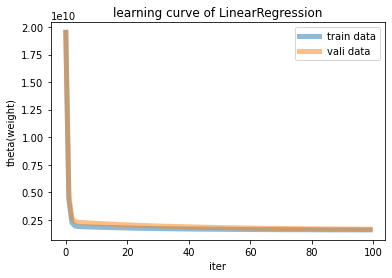

In [18]:
plt.title('learning curve of LinearRegression')
plt.xlabel('iter')
plt.ylabel('theta(weight)')
plt.plot(a.loss, linewidth=5, alpha=0.5, label='train data')
plt.plot(a.val_loss, linewidth=5, alpha=0.5, label='vali data')
plt.legend()
plt.show()